In [1]:
# https://github.com/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Stock%20Market%20Analysis.ipynb

In [16]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division
import quandl as qd
import pandas_datareader as pdr
import datetime 
import csv
sns.set_style('white')
%matplotlib inline
import pandas_datareader.data as web

In [2]:
# Allow us to read stock data from google etc
from pandas_datareader import DataReader

In [1]:
tech_list  = ['AAPL','GOOGL', 'MSFT','AMZN']

In [4]:
tech_list

['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [23]:
from datetime import *
import pytz
utc=pytz.UTC
today = datetime.now().replace(tzinfo=utc)



In [24]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [25]:
# for stock in tech_list:
#     globals()[stock] = web.DataReader(stock,'Stooq',start,end)
    
symbol  = ['AAPL','GOOGL','MSFT','AMZN']
start = datetime.datetime(2012, 10, 1)

end = datetime.datetime(2018, 1, 1)
for mSymbol in symbol:
    closing_df = web.DataReader(mSymbol,'quandl',start,end)['AdjClose']

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [26]:
closing_df.tail()

Date
2012-10-05    258.51
2012-10-04    260.47
2012-10-03    255.92
2012-10-02    250.60
2012-10-01    252.01
Name: AdjClose, dtype: float64

In [7]:
# myDict = {}

# for stock in tech_list:myDict[stock] = pdr.get_data_quandl(stock,start=datetime.datetime(2012,10,1),
#                                                            end=datetime.datetime(2018,1,1))

In [9]:
import quandl as qd
import pandas_datareader as pdr
import datetime

GOOGL = pdr.get_data_quandl('GOOGL',start=datetime.datetime(2012, 10, 1), 

                          end=datetime.datetime(2018, 1, 1))
AAPL = pdr.get_data_quandl('AAPL',start=datetime.datetime(2012, 10, 1), 

                          end=datetime.datetime(2018, 1, 1))

MSFT = pdr.get_data_quandl('MSFT',start=datetime.datetime(2012, 10, 1), 

                          end=datetime.datetime(2018, 1, 1))
AMZN = pdr.get_data_quandl('AMZN',start=datetime.datetime(2012, 10, 1), 

                         end=datetime.datetime(2018, 1, 1))

In [10]:
GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1320 entries, 2017-12-29 to 2012-10-01
Data columns (total 12 columns):
Open          1320 non-null float64
High          1320 non-null float64
Low           1320 non-null float64
Close         1320 non-null float64
Volume        1320 non-null float64
ExDividend    1320 non-null float64
SplitRatio    1320 non-null float64
AdjOpen       1320 non-null float64
AdjHigh       1320 non-null float64
AdjLow        1320 non-null float64
AdjClose      1320 non-null float64
AdjVolume     1320 non-null float64
dtypes: float64(12)
memory usage: 134.1 KB


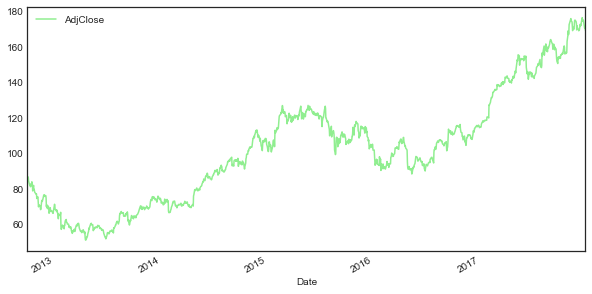

In [14]:
AAPL['AdjClose'].plot(legend=True,figsize=(10,5),color='lightgreen')

In [156]:
# ma_day = [10, 20, 50]
# for ma in ma_day:
#     column_name = "MA for {0} days".format(ma) 
#     AAPL[column_name] = AAPL.rolling(window=ma).AdjClose.mean()

In [88]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = "MA For %s days" %(str(ma))
    AAPL[column_name] = AAPL.rolling(window=ma).AdjClose.mean()

In [31]:
#GOOGL['MA_10'] = GOOGL.rolling(window=10).AdjClose.mean()
#GOOGL['MA_20'] = GOOGL.rolling(window=20).AdjClose.mean()
#GOOGL['MA_50'] = GOOGL.rolling(window=50).AdjClose.mean()

In [17]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0


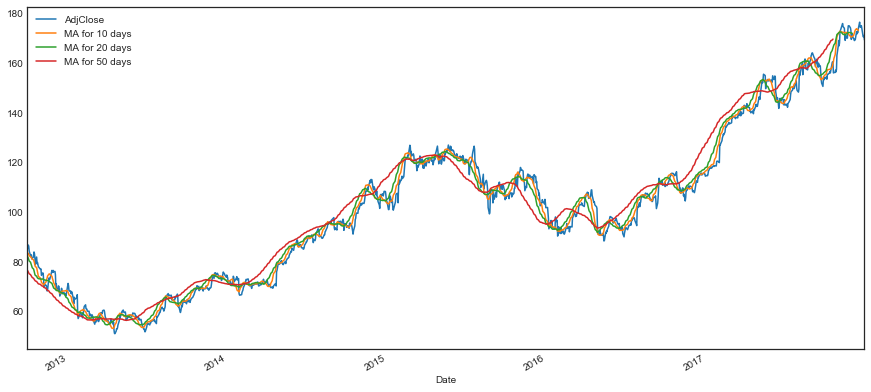

In [39]:
AAPL[['AdjClose','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,7))

In [83]:
pwd

'C:\\Users\\Ashish'

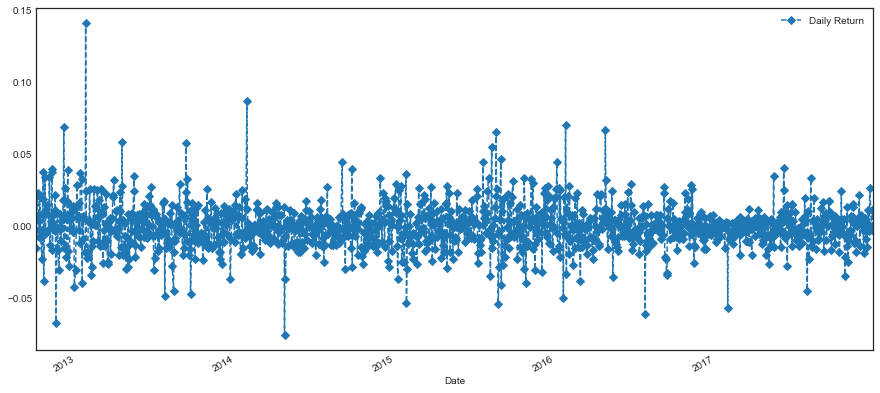

In [150]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()

AAPL['Daily Return'].plot(figsize=(15,7),legend=True,linestyle='--',marker='D')

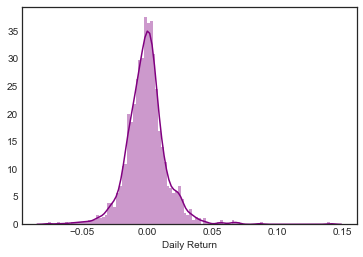

In [13]:
# One on other using displot

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

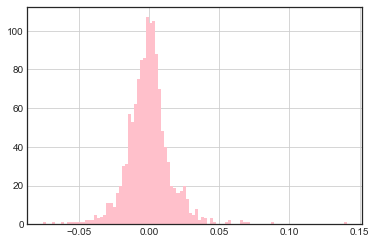

In [151]:
AAPL['Daily Return'].hist(bins = 100,color = 'pink')